# minist手写数字的识别

·数据加载
·数据处理
·模型构建
·模型训练
·模型测试
·模型保存

In [6]:
#导入工具包
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] =(7,7)
import tensorflow as tf 
#数据集
from tensorflow.keras.datasets import mnist
#构建序列模型
from tensorflow.keras.models import Sequential
#导入需要的层
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
#导入辅助工具包
from tensorflow.keras import utils
#正则化
from tensorflow.keras import regularizers

# 1、数据加载

In [4]:
nb_classes=10
#加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#打印数据的维度
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
##需要翻墙，不然下载不了数据

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


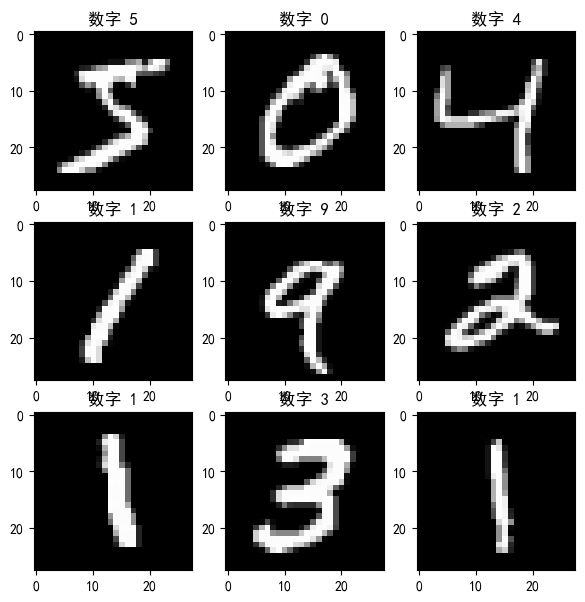

In [7]:
#数据展示：
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("数字 {}".format(y_train[i]))#从y_train中取出的第i个类别标签

# 2、数据处理

In [8]:
# 调整数据维度：每⼀个数字转换成⼀个向量
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# 格式转换
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归⼀化
X_train /= 255
X_test /= 255
# 维度调整后的结果
print("训练集：", X_train.shape)
print("测试集：", X_test.shape)

训练集： (60000, 784)
测试集： (10000, 784)


In [9]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# 将⽬标值转换为热编码的形式
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

# 3、构建模型

In [11]:
# 利⽤序列模型来构建模型
model = Sequential()
# 全连接层，共512个神经元，输⼊维度⼤⼩为784
model.add(Dense(512, input_shape=(784,)))
# 激活函数使⽤relu
model.add(Activation('relu')) 
# 使⽤正则化⽅法drouout 
model.add(Dropout(0.2)) 
# 全连接层，共512个神经元,并加⼊L2正则化
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))
# BN层
model.add(BatchNormalization())
# 激活函数
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 全连接层，输出层共10个神经元
model.add(Dense(10))
# softmax将神经⽹络输出的score转换为概率值
model.add(Activation('softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

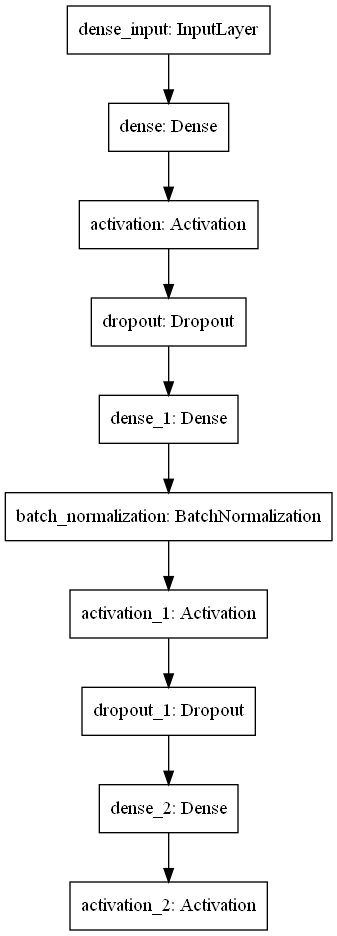

In [13]:
utils.plot_model(model)

# 4、模型编译

In [14]:
# 模型编译，指明损失函数和优化器，评估指标
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5、模型训练

In [15]:
# batch_size是每次送⼊模型中样本个数，epochs是所有样本的迭代次数，verbose是⽤于控制输出⽂本的详细程度(进度条，日志信息等)
history = model.fit(X_train, Y_train,
 batch_size=128, epochs=4,verbose=1,
 validation_data=(X_test, Y_test))


Epoch 1/4
469/469 [==============================] - 2s 3ms/step - loss: 0.5301 - accuracy: 0.9306 - val_loss: 0.2783 - val_accuracy: 0.9622
Epoch 2/4
469/469 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9653 - val_loss: 0.1748 - val_accuracy: 0.9715
Epoch 3/4
469/469 [==============================] - 1s 3ms/step - loss: 0.1582 - accuracy: 0.9717 - val_loss: 0.1398 - val_accuracy: 0.9755
Epoch 4/4
469/469 [==============================] - 1s 3ms/step - loss: 0.1329 - accuracy: 0.9768 - val_loss: 0.1413 - val_accuracy: 0.9751


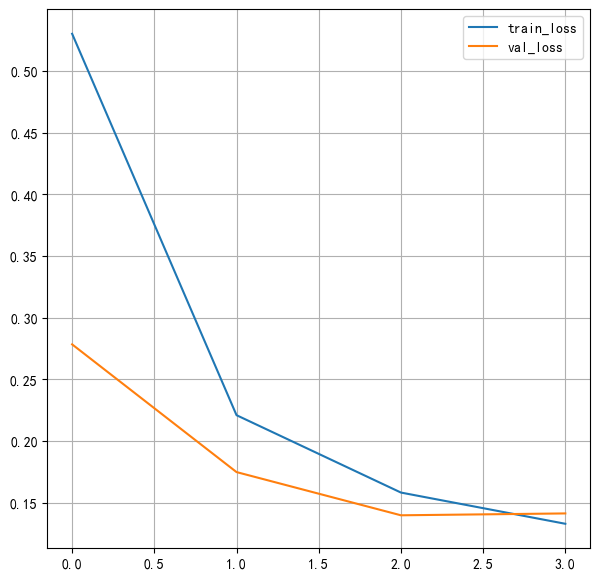

In [16]:
# 绘制损失函数的变化曲线
plt.figure()
# 训练集损失函数变换
plt.plot(history.history["loss"], label="train_loss")
# 验证集损失函数变化
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.grid()

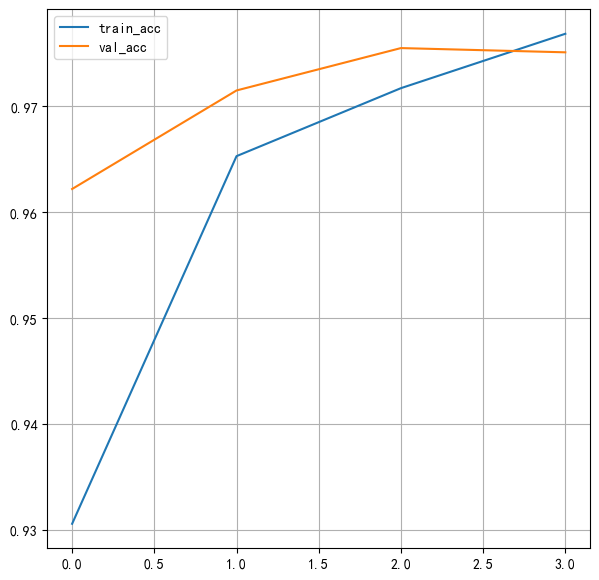

In [17]:
# 绘制准确率的变化曲线
plt.figure()
# 训练集准确率
plt.plot(history.history["accuracy"], label="train_acc")
# 验证集准确率
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.grid()

# 添加tensoboard观察

In [19]:
# 添加tensoboard观察
from tensorflow.keras.callbacks import TensorBoard
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=1, write_graph=True, write_images=True)



In [20]:
# batch_size是每次送⼊模型中样本个数，epochs是所有样本的迭代次数，verbose是⽤于控制输出⽂本的详细程度(进度条，日志信息等)
history = model.fit(X_train, Y_train,
 batch_size=128, epochs=4,verbose=1,callbacks=[tensorboard],
 validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1219 - accuracy: 0.9787 - val_loss: 0.1313 - val_accuracy: 0.9775
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1193 - accuracy: 0.9793 - val_loss: 0.1419 - val_accuracy: 0.9756
Epoch 3/4
469/469 [==============================] - 2s 3ms/step - loss: 0.1084 - accuracy: 0.9824 - val_loss: 0.1329 - val_accuracy: 0.9765
Epoch 4/4
469/469 [==============================] - 2s 3ms/step - loss: 0.1045 - accuracy: 0.9833 - val_loss: 0.1239 - val_accuracy: 0.9791


In [ ]:
#指定存在⽂件的⽬录，打开下⾯命令
#tensorboard --logdir="./"


# 6、模型测试

In [22]:
# 模型测试
score = model.evaluate(X_test, Y_test, verbose=1)
# 打印结果
print('测试集准确率:', score)


313/313 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 0.9791
测试集准确率: [0.12392827123403549, 0.9790999889373779]


# 7、模型保存

In [23]:
# 保存模型架构与权重在h5⽂件中
model.save('my_model.h5')


In [24]:
# 加载模型：包括架构和对应的权重
loadmodel = tf.keras.models.load_model('my_model.h5')

In [26]:
loadmodel.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1239 - accuracy: 0.9791


[0.12392827123403549, 0.9790999889373779]